# Meta Methods

In [1]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
data = pd.read_csv('games_clean.csv')

In [4]:
#data.drop(['RatingsBreakdown-Recommended', 'RatingsBreakdown-Meh', 'RatingsBreakdown-Exceptional', 'RatingsBreakdown-Skip', 'Presence'], inplace=True, axis=1)
column = data.columns.get_loc('Metacritic')
y = data.iloc[:,column]
X = data.loc[:, data.columns != 'Metacritic']

In [5]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)




In [6]:
data.loc[:, data.columns != 'Metacritic']

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Web Publishing,Well-Written,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,333.0,512.0,2019.0,1.99,0.0,0.0,200.0,2.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,363.0,1000.0,2016.0,2.99,0.0,0.0,350.0,1.0,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,102.0,1024.0,2019.0,0.99,0.0,0.0,122.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,269.0,4000.0,2019.0,0.00,0.0,0.0,300.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,217.0,4000.0,2016.0,11.99,0.0,18.0,4000.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,161.0,512.0,2014.0,1.99,0.0,0.0,150.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2196,411.0,4000.0,2020.0,11.99,0.0,0.0,700.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2197,249.0,4000.0,2016.0,3.99,0.0,20.0,100.0,1.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2198,191.0,1000.0,2019.0,14.99,0.0,0.0,800.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


## Normalization
Data should be numerical and normalized or standarized

In [7]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
#X = scaler.transform(X)

## Voting scheme

In [20]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=100

clf1 = GaussianNB()

clf2 = KNeighborsClassifier(n_neighbors=7,weights='distance')

clf3 = DecisionTreeClassifier(max_depth=13, criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

Accuracy: 0.277 [Naive Bayes]
Accuracy: 0.296 [Knn (3)]
Accuracy: 0.499 [Dec. Tree]


In [21]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.388 [Majority Voting]


In [22]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.506 [Weighted Voting]


## Bagging

In [16]:
from sklearn.ensemble import BaggingClassifier
import time

lb=[]
lb_time=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=13, criterion='entropy'),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    lb_time.append(time.time() - start)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

Accuracy: 0.483 [1]
Accuracy: 0.483 [2]
Accuracy: 0.543 [5]
Accuracy: 0.564 [10]
Accuracy: 0.574 [20]
Accuracy: 0.583 [50]
Accuracy: 0.584 [100]


NameError: name 'end' is not defined

In [17]:
lb2=[]    
lb2_time=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=13, criterion='entropy'),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    lb2_time.append(time.time()  - start)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.349 [1]
Accuracy: 0.348 [2]
Accuracy: 0.392 [5]
Accuracy: 0.446 [10]
Accuracy: 0.480 [20]
Accuracy: 0.525 [50]
Accuracy: 0.535 [100]


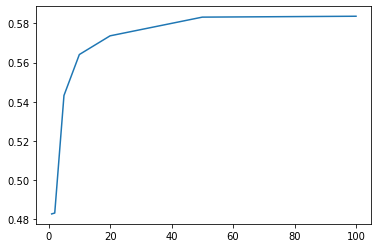

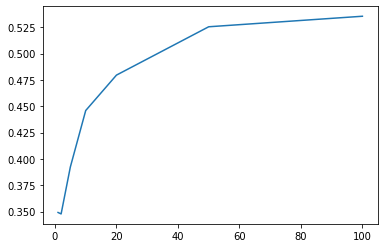

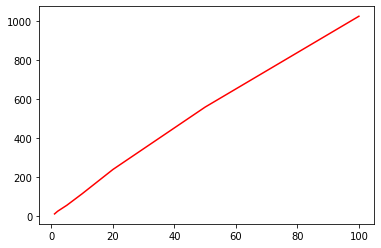

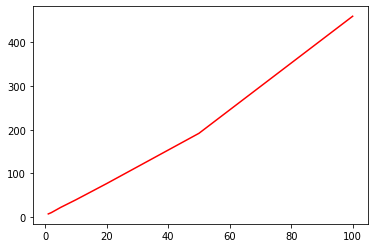

In [19]:
plt.plot([1,2,5,10,20,50,100],lb,label="Bagging DT")
plt.show()
plt.plot([1,2,5,10,20,50,100],lb2,label="Bagging DT forced variance")
plt.show()
plt.plot([1,2,5,10,20,50,100],lb_time,label="Bagging DT", color = "red")
plt.show()
plt.plot([1,2,5,10,20,50,100],lb2_time,label="Bagging DT forced variance", color = "red")
plt.show()

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest, max_depth=13,n_jobs=-1), X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.349 [1]
Accuracy: 0.362 [2]
Accuracy: 0.395 [5]
Accuracy: 0.421 [10]
Accuracy: 0.438 [20]
Accuracy: 0.469 [50]
Accuracy: 0.479 [100]


In [24]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest, max_depth=13, n_jobs=-1), X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.306 [1]
Accuracy: 0.307 [2]
Accuracy: 0.333 [5]
Accuracy: 0.357 [10]
Accuracy: 0.353 [20]
Accuracy: 0.383 [50]
Accuracy: 0.379 [100]


## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.347 [1]
Accuracy: 0.357 [2]
Accuracy: 0.390 [5]
Accuracy: 0.427 [10]
Accuracy: 0.430 [20]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()